In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

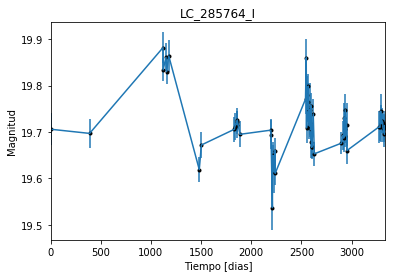

In [2]:
data = np.genfromtxt('LC_285764_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_285764_I')
plt.savefig("LC_285764_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

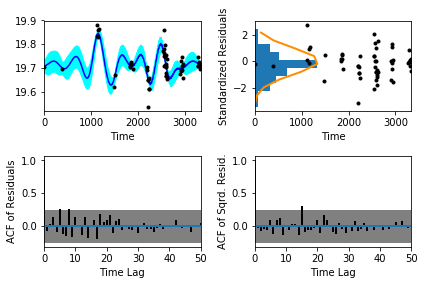

In [5]:
sample.assess_fit()

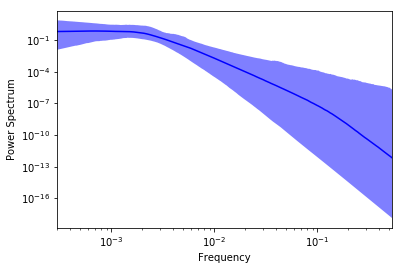

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

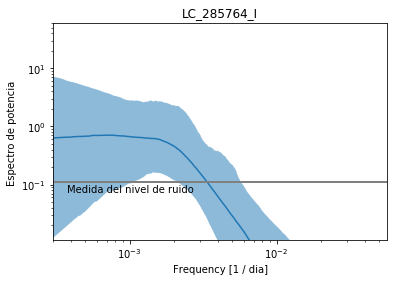

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_285764_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_285764_I')

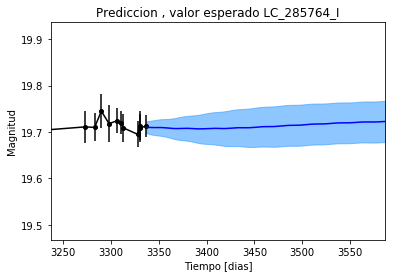

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_285764_I')

Text(0.5,1,'Prediccion, Caminos simulados_LC_285764_I')

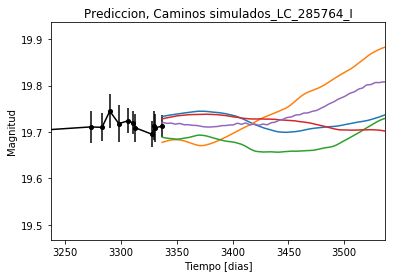

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_285764_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


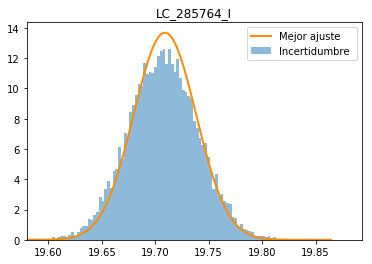

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_285764_I')
plt.savefig("Mejor_ajuste_LC_285764_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_285764_I')

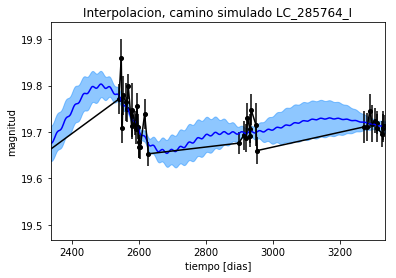

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_285764_I')

Text(0.5,1,'Interpolacion, camino simulado LC_285764_I')

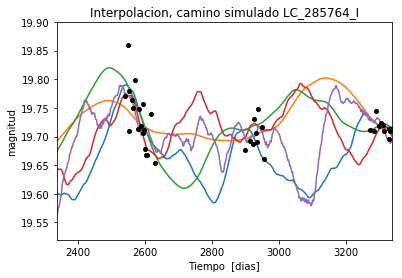

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_285764_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 712.390780074
Median: 0.00440566590288
Standard deviation: 0.147101007206
68% credibility interval: [ 0.00060674  0.07369448]
95% credibility interval: [  3.25091797e-04   5.92350878e-01]
99% credibility interval: [  3.05057457e-04   9.02355036e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1139.70642106
Median: 0.00210368572909
Standard deviation: 0.0740901509565
68% credibility interval: [ 0.00053681  0.02366003]
95% credibility interval: [ 0.00032145  0.20519058]
99% credibility interval: [  3.04485935e-04   5.92847448e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 557.687349808
Median: 0.00519326418227
Standar

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 734.479487974
Median: 139.909863081
Standard deviation: 1.88431957827
68% credibility interval: [ 137.8812105   141.50810879]
95% credibility interval: [ 135.24692567  142.54942632]
99% credibility interval: [ 133.07374638  142.8524433 ]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 674.59123924
Median: 0.344157663504
Standard deviation: 1.96484078287
68% credibility interval: [ 0.03877071  2.99947092]
95% credibility interval: [ 0.01312399  7.05953808]
99% credibility interval: [  9.07979055e-03   9.08777497e+00]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 400.907284486
Median: 0.286408568185
Standard deviation: 9.17243610922
68% credibility interval: [ 0.00930383  8.42451792]
95% credibility interval: [  9.94

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1728.56903023
Median: 2.93275955147e-51
Standard deviation: 3.40018065024e+25
68% credibility interval: [  5.22067184e-119   3.96172776e+002]
95% credibility interval: [  1.15065692e-160   7.30757549e+016]
99% credibility interval: [  1.16454346e-186   4.49409994e+021]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2993.10356744
Median: 19.7109570986
Standard deviation: 0.0258581211556
68% credibility interval: [ 19.69038511  19.73329202]
95% credibility interval: [ 19.66109781  19.76233867]
99% credibility interval: [ 19.62977125  19.79395227]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 282.678052686
Median: 0.0122922623926
Standard deviation: 0.258305557393
68% credibility interval: [ 0.          0.37976887]
95% credibility interval: [ 0.          0.93874307]
99% credibility interval: [ 0.          1.04020304]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 282.678052686
Median: 0.0122922623926
Standard deviation: 0.258305557393
68% credibility interval: [ 0.          0.37976887]
95% credibility interval: [ 0.          0.93874307]
99% credibility interval: [ 0.          1.04020304]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 302.348771959
Median: 0.0
Standard deviation: 0.00106620249926
68% cre

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 734.479487974
Median: 139.909863081
Standard deviation: 1.88431957827
68% credibility interval: [ 137.8812105   141.50810879]
95% credibility interval: [ 135.24692567  142.54942632]
99% credibility interval: [ 133.07374638  142.8524433 ]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1461.63858729
Median: 0.00445049698154
Standard deviation: 0.00432966093257
68% credibility interval: [ 0.00274133  0.0076743 ]
95% credibility interval: [ 0.00175885  0.01560639]
99% credibility interval: [ 0.00140322  0.0250874 ]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2542.17903047
Median: 0.975498953288
Standard deviation: 0.14936769965
68% credibility interval: [ 0.84793204  1.14016008]
95% credibility interval: [ 0.74281125  1.32625981]
99% credibility interval: [ 0.68544131  1.46274863]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 757.353492063
Median: 3.15249532586e-05
Standard deviation: 0.0437643723836
68% credibility interval: [  2.74169259e-08   1.64160642e-03]
95% credibility interval: [  2.44176913e-21   2.29823653e-02]
99% credibility interval: [  2.43087933e-25   2.24118294e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 712.390780074
Median: (-0.0276816152693-0.106498992028j)
Standard deviation: 1.86770753273
68% credibility interval: [-0.46303605+0.j         -0.00381224-0.01325856j]
95% credibility interval: [ -3.72185033e+00-0.16654052j  -2.04261200e-03-0.14260559j]
99% credibility interval: [ -5.66966390e+00+0.j          -1.91673253e-03-0.00614621j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1139.70642106
Median: (-0.013217847264+0.015390347239j)
Standard deviation: 1.68842542431
68% credibility interval: [-0.14866038+0.03994004j -0.00337285+0.j        ]
95% credibility interval: [-1.28925042+2.14274014j -0.00201971+2.97540868j]
99% credibility interval: [ -3.72497038e+00+6.661621j    -1.91314155e-03+0.14512146j]
Posterior sum